In [43]:
# Dependencies and Setup
%load_ext lab_black
import pandas as pd
import numpy as np
import requests
import json
import world_bank_data as wb
import plotly
import plotly.express as px

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [44]:
# Extracting GDP_2018 data from World Bank using wrapped api
GDP_WB = wb.get_series(
    "NY.GDP.MKTP.CD", date="2018", id_or_value="id", simplify_index=True
)
GDP_WB

Country
ARB    2.772025e+12
CSS    7.345916e+10
CEB    1.637175e+12
EAR    1.163520e+13
EAS    2.634698e+13
           ...     
VIR             NaN
PSE    1.461590e+10
YEM    2.759126e+10
ZMB    2.700524e+10
ZWE    2.431156e+10
Name: NY.GDP.MKTP.CD, Length: 264, dtype: float64

In [45]:
# Creating data frame for World Bank's GDP_2018 data: df_GDP
df_GDP = pd.DataFrame(GDP_WB).reset_index()
df_GDP

,Country,NY.GDP.MKTP.CD
0,ARB,2.772025e+12
1,CSS,7.345916e+10
2,CEB,1.637175e+12
3,EAR,1.163520e+13
4,EAS,2.634698e+13
...,...,...
259,VIR,NaN
260,PSE,1.461590e+10
261,YEM,2.759126e+10
262,ZMB,2.700524e+10


In [46]:
# Converting GDP-USD (NY.GDP.MKTP.CD) data to million
GDP_2018_million = np.array(df_GDP["NY.GDP.MKTP.CD"] / 1000000)
len(GDP_2018_million)

264

In [47]:
# Adding a new column "GDP_2018 (million)" to data frame df_GDP
df_GDP["GDP_2018 (million)"] = GDP_2018_million
df_GDP

,Country,NY.GDP.MKTP.CD,GDP_2018 (million)
0,ARB,2.772025e+12,2.772025e+06
1,CSS,7.345916e+10,7.345916e+04
2,CEB,1.637175e+12,1.637175e+06
3,EAR,1.163520e+13,1.163520e+07
4,EAS,2.634698e+13,2.634698e+07
...,...,...,...
259,VIR,NaN,NaN
260,PSE,1.461590e+10,1.461590e+04
261,YEM,2.759126e+10,2.759126e+04
262,ZMB,2.700524e+10,2.700524e+04


In [48]:
# Exporting & saving df_GDP data to csv file
# df_GDP.to_csv("Resources/GDP_WB.csv", index=False)

In [49]:
# Reading the csv files for independent and dependent variables
GDP_2018 = pd.read_csv("Resources/GDP_WB.csv")
innov_tech_2018 = pd.read_csv("Resources/Innovation&Technology_WB.csv")
doing_busn_2018 = pd.read_csv("Resources/DoingBusiness_WB.csv")
capital_lat_lng = pd.read_csv("Resources/Capital_Lat_Lng.csv")
FDI_USA_2018 = pd.read_csv("Resources/InwardFDI_USA_BeaGOV.csv")

In [50]:
# Merging GDP_2018 and innov_tech_2018 for Country and country_name
df_1 = pd.merge(GDP_2018, innov_tech_2018, on="Country", how="outer").drop(
    [
        "NY.GDP.MKTP.CD",
        "GDP_2018 (million)",
        "indicator_name",
        "indicator_code",
        "tech_export_2017 (million)",
        "tech_export_2018 (million)",
        "tech_export_2019 (million)",
    ],
    axis=1,
)

df_1

,Country,country_name
0,ARB,Arab World
1,CSS,Caribbean small states
2,CEB,NaN
3,EAR,NaN
4,EAS,NaN
...,...,...
259,VIR,NaN
260,PSE,West Bank and Gaza
261,YEM,"Yemen, Rep."
262,ZMB,Zambia


In [51]:
# Merging for capital_city, lat, and lng
df_2 = pd.merge(df_1, capital_lat_lng, on="country_name", how="outer")
df_2

,Country,country_name,capital_city,lat,lng
0,ARB,Arab World,NaN,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667
2,CEB,NaN,NaN,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN
...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745


In [52]:
# Merging for GDP_2018 (million)
df_3 = pd.merge(df_2, GDP_2018, on="Country", how="outer").drop(
    ["NY.GDP.MKTP.CD"], axis=1,
)
df_3

,Country,country_name,capital_city,lat,lng,GDP_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07
...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN


In [53]:
# Merging for tech_export_2018 (million)
df_4 = (
    pd.merge(df_3, innov_tech_2018, on="country_name", how="outer")
    .drop(
        [
            "Country_y",
            "indicator_name",
            "indicator_code",
            "tech_export_2017 (million)",
            "tech_export_2019 (million)",
        ],
        axis=1,
    )
    .rename(columns={"Country_x": "country_code"})
)

df_4

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN
...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN


In [54]:
# Merging for doing_business_2018
df_5 = pd.merge(df_4, doing_busn_2018, on="country_name", how="outer").drop(
    ["doing_business_2017", "doing_business_2019"], axis=1,
)
df_5

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN,NaN
...,...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN,NaN


In [55]:
# Dependent Variable = FDI in USA; extracting FDI in USA data for 2018 and cleaning for null values
df_6 = FDI_USA_2018.drop(
    ["fdi_USA_2017 (million)", "fdi_USA_2019 (million)"], axis=1,
).dropna()

df_6

,country_name,region,fdi_USA_2018 (million)
0,Afghanistan,Asia,1.0
1,Albania,Europe,0.0
3,Andorra,Europe,0.0
6,Antigua and Barbuda,Latin America,3.0
7,Argentina,Latin America,822.0
...,...,...,...
201,Vietnam,Asia,59.0
202,Western Sahara,Africa,0.0
203,"Yemen, Rep.",Asia,0.0
204,Zambia,Africa,-6.0


In [56]:
# Creating the clean dataset for analysis
clean_data = pd.merge(df_5, df_6, on="country_name", how="right")
clean_data

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
0,AFG,Afghanistan,Kabul,34.5289,69.1725,19484.384937,NaN,37.1,Asia,1.0
1,ALB,Albania,Tiranë (Tirana),41.3275,19.8189,15147.020535,0.5917,66.8,Europe,0.0
2,AND,Andorra,Andorra la Vella,42.5078,1.5211,3218.316013,33.9135,NaN,Europe,0.0
3,ATG,Antigua and Barbuda,St. John's,17.1172,-61.8457,1610.574074,0.0114,59.8,Latin America,3.0
4,ARG,Argentina,Buenos Aires,-34.6051,-58.4004,519871.519808,647.1724,57.3,Latin America,822.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,Taiwan,Taibei,25.0470,121.5457,NaN,NaN,80.7,Asia,10512.0
176,NaN,Western Sahara,El Aaiún,27.1532,-13.2014,NaN,NaN,NaN,Africa,0.0
177,NaN,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,Latin America,1335.0
178,NaN,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,Africa,0.0


# Begin Eds Work

In [90]:
europe = clean_data[clean_data.region == "Europe "]

europe.head()

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
1,ALB,Albania,Tiranë (Tirana),41.3275,19.8189,15147.020535,0.5917,66.8,Europe,0.0
2,AND,Andorra,Andorra la Vella,42.5078,1.5211,3218.316013,33.9135,NaN,Europe,0.0
5,ARM,Armenia,Yerevan,40.1820,44.5146,12457.941907,36.2933,71.5,Europe,3.0
8,AUT,Austria,Wien (Vienna),48.2064,16.3707,455508.255028,16687.4995,78.7,Europe,12392.0
9,AZE,Azerbaijan,Baku,40.3777,49.8920,47112.941176,21.1780,66.8,Europe,-2.0


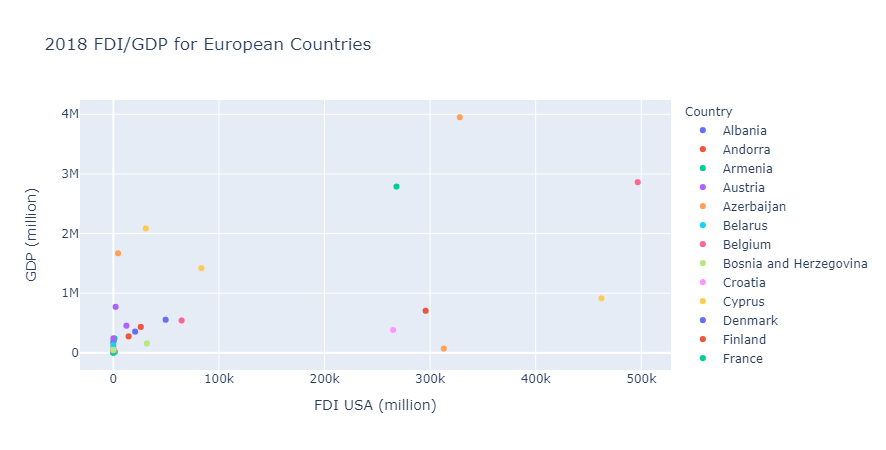

In [91]:
europe_format_name = europe.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)
europe_fdi_gdp_scatter = px.scatter(
    europe_format_name,
    x="FDI USA (million)",
    y="GDP (million)",
    title="2018 FDI/GDP for European Countries",
    color="Country",
)
europe_fdi_gdp_scatter.write_image("europe_fdi_gdp_scatter.png")
europe_fdi_gdp_scatter

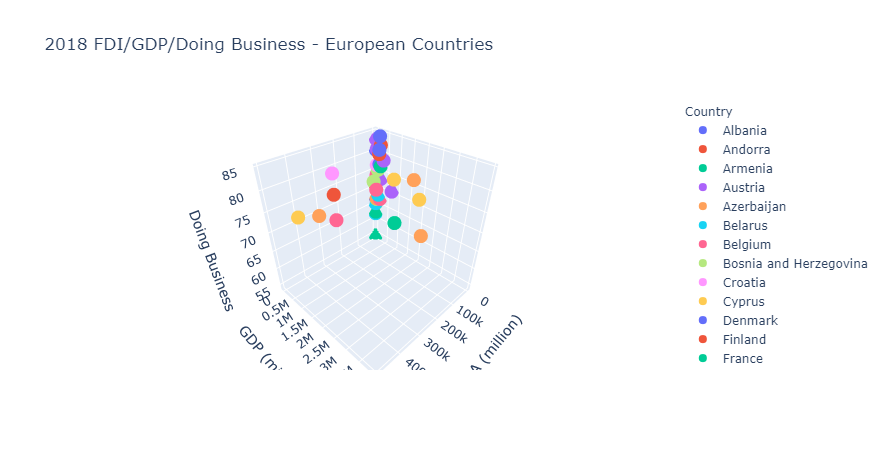

In [92]:
europe_fdi_gdp_db_3d = px.scatter_3d(
    europe_format_name,
    x="FDI USA (million)",
    y="GDP (million)",
    z="Doing Business",
    title="2018 FDI/GDP/Doing Business - European Countries",
    color="Country",
)
europe_fdi_gdp_db_3d.write_image("europe_fdi_gdp_db_3d.png")
europe_fdi_gdp_db_3d

# Begin Europe to 10 by GDP

In [95]:
europe = clean_data[clean_data.region == "Europe "]
europe_top_10 = europe.sort_values(by=["GDP_2018 (million)"], ascending=False)

europe_top_10.head()

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
50,FRA,France,Paris,48.8534,2.3488,2.787864e+06,118000.0000,76.0,Europe,268169.0
70,ITA,Italy,Roma (Rome),41.8947,12.4811,2.085764e+06,32581.0252,73.2,Europe,30749.0
126,RUS,Russian Federation,Moskva (Moscow),55.7550,37.6218,1.669583e+06,10183.0078,76.5,Europe,4455.0


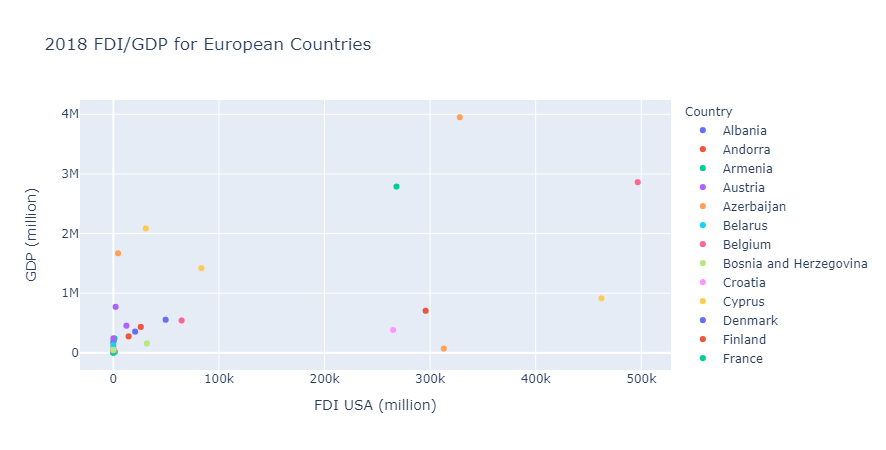

In [97]:
europe_top_10_format_name = europe.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)

europe_top_10_fdi_gdp_scatter = px.scatter(
    europe_top_10_format_name,
    x="FDI USA (million)",
    y="GDP (million)",
    title="2018 FDI/GDP for European Countries",
    color="Country",
)
# europe_top_10_fdi_gdp_scatter.write_image("europe_top_10_fdi_gdp_scatter.png")
europe_top_10_fdi_gdp_scatter